# Interacting with GPIO from MicroBlaze

In [240]:
from pynq.overlays.base import BaseOverlay
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

base = BaseOverlay("base.bit")

In [241]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to reset all pins of PMODB
void reset_gpio(){
    for (unsigned int i = 0; i < 8; i++){
        write_gpio(i, 0);
    }
}

Text(0.5,1,'perceived brightness')

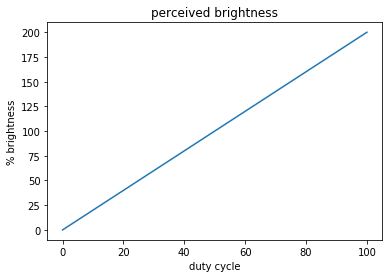

In [242]:
reset_gpio()
duty_cycle = 1
duration = 0
while duration != 100: #3secs
    write_gpio(3,1)
    time.sleep(duty_cycle * 0.03)
    write_gpio(3,0)
    time.sleep((1 - duty_cycle) * 0.03)
    duration += 1
    
duty_cycle = 0.75
duration = 0
while duration != 100: #3secs
    write_gpio(3,1)
    time.sleep(duty_cycle * 0.03)
    write_gpio(3,0)
    time.sleep((1 - duty_cycle) * 0.03)
    duration += 1
    
duty_cycle = 0.5
duration = 0
while duration != 100: #3secs
    write_gpio(3,1)
    time.sleep(duty_cycle * 0.03)
    write_gpio(3,0)
    time.sleep((1 - duty_cycle) * 0.03)
    duration += 1

duty_cycle = 0.25
duration = 0
while duration != 100: #3secs
    write_gpio(3,1)
    time.sleep(duty_cycle * 0.03)
    write_gpio(3,0)
    time.sleep((1 - duty_cycle) * 0.03)
    duration += 1

x_vals = [0, 25, 50, 75, 100]
y_vals = [0, 50, 100, 150, 200]
plt.plot(x_vals, y_vals)
plt.xlabel('duty cycle')
plt.ylabel('% brightness')
plt.title('perceived brightness')

In [243]:
base = BaseOverlay("base.bit")

In [244]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to reset all pins of PMODB
void reset_gpio(){
    for (unsigned int i = 0; i < 8; i++){
        write_gpio(i, 0);
    }
}

In [245]:
# %100 duty cycle
import asyncio
cond = True
blink = True
pin = 3

async def flash_led():
    global cond, blink, pin
    reset_gpio()
    while cond:
        write_gpio(pin,1)
        await asyncio.sleep(1)
        if blink:
            write_gpio(pin,0)
        await asyncio.sleep(1)
            

async def get_btns(_loop):
    global cond, blink, pin
    while cond:
        await asyncio.sleep(0.0001)
        if base.buttons[0].read() != 0:
            reset_gpio()
            pin = 3
        elif base.buttons[1].read() != 0:
            reset_gpio()
            pin = 2
        elif base.buttons[2].read() != 0:
            reset_gpio()
            pin = 1
        elif base.buttons[3].read() != 0:
            blink = False
            _loop.stop()
            cond = False

loop = asyncio.new_event_loop()
loop.create_task(flash_led())
loop.create_task(get_btns(loop))
loop.run_forever()
loop.close()
print("Done.")

Done.
